In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

In [2]:
# Especifica la ruta de tu archivo .csv
name = 'Municipal-Delitos-2015-2023_nov2023.csv'

# Utiliza pd.read_csv() para leer el archivo de texto
delitos_entidades = pd.read_csv(name, encoding='latin1')

# Especifica la ruta de tu archivo .csv
name = 'Poblacion_Entidades.xlsx'

# Utiliza pd.read_csv() para leer el archivo de texto
poblacion_entidades = pd.read_excel(name)

In [3]:
# Creamos la nueva columna 'Delitos' sumando los valores de los meses
delitos_entidades['Delitos'] = delitos_entidades.iloc[:, 9:].sum(axis=1)

# Convertimos los meses a tipo entero
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Llenamos los valores NaN con 0
delitos_entidades = delitos_entidades.fillna(0)

delitos_entidades[meses] = delitos_entidades[meses].astype(int)



In [4]:
#df['Entidad'].unique()

df = delitos_entidades.groupby(['Año','Entidad','Tipo de delito'])['Delitos'].sum().reset_index()


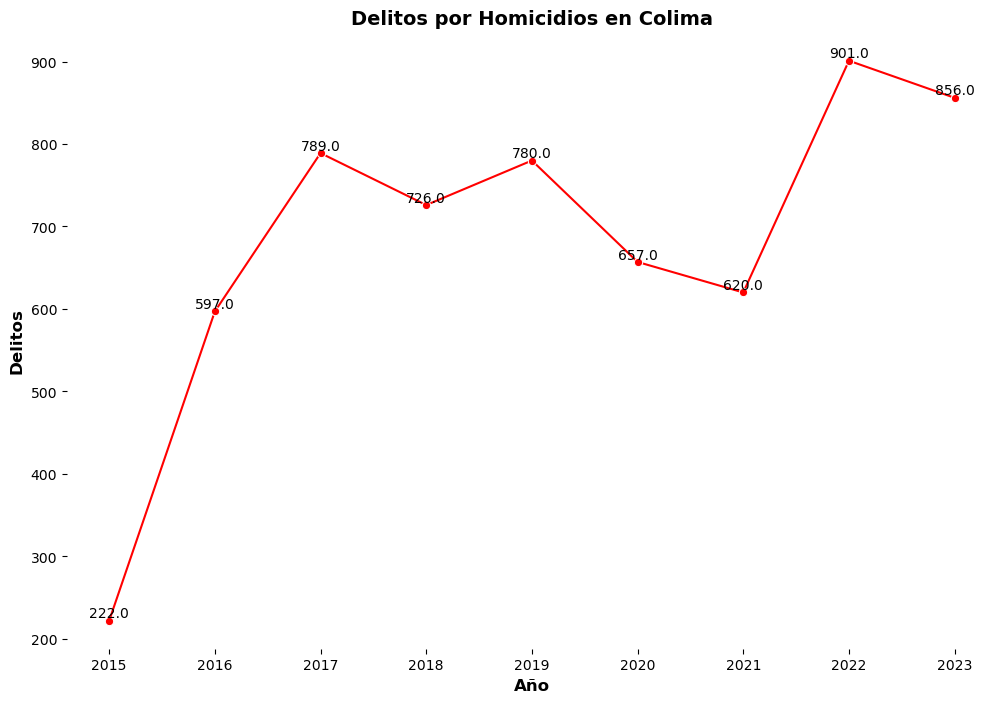

In [5]:


df_filtered = df.loc[(df['Entidad'] == 'Colima') & (df['Tipo de delito'] == 'Homicidio')]

# Modificar el estilo de la gráfica utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_filtered, x='Año', y='Delitos', marker='o', color='red')

# Configurar el estilo y etiquetas
plt.title('Delitos por Homicidios en Colima', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Delitos', fontsize=12, fontweight='bold', color='k')

# Configurar el fondo a blanco
plt.gca().set_facecolor('white')

# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)

# Agregar los valores 'Delitos' como texto en la gráfica
for index, row in df_filtered.iterrows():
    plt.text(row['Año'], row['Delitos'], str(row['Delitos']), ha='center', va='bottom',fontsize=10)


# Exportar la gráfica a un archivo SVG
plt.savefig('HomicidiosColima.svg', format='svg', bbox_inches='tight')

# Mostrar la gráfica
plt.show()


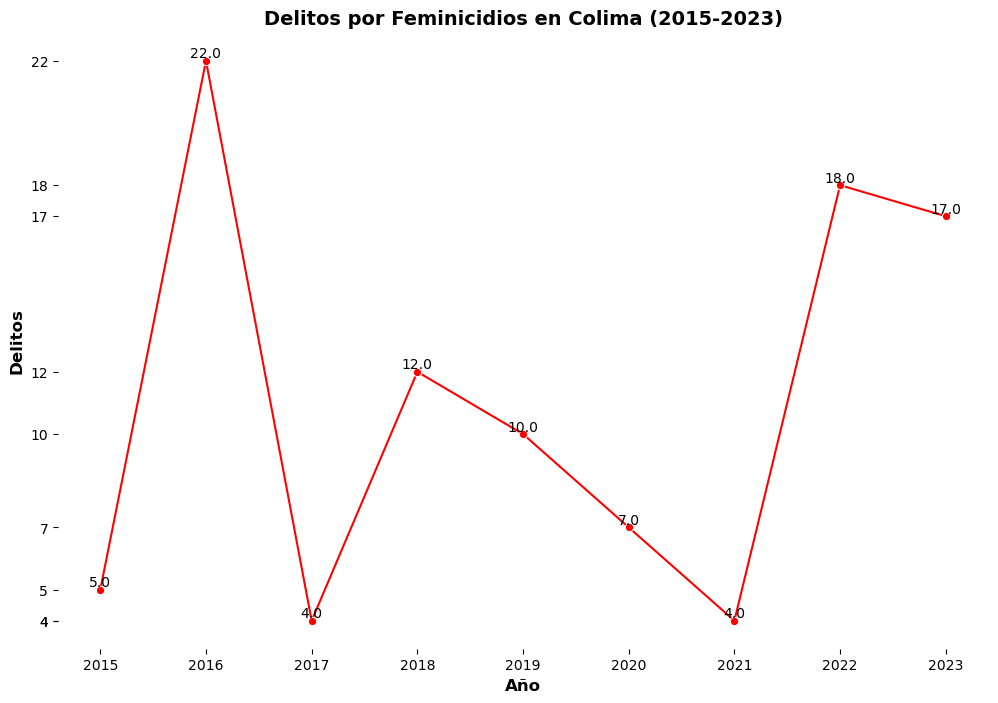

In [6]:
# Supongamos que 'Año' es el nombre de la columna que representa el eje x y 'Número de casos' es el nombre de la columna que representa el eje y.
df_filtered = df.loc[(df['Entidad'] == 'Colima') & (df['Tipo de delito'] == 'Feminicidio')]

# Modificar el estilo de la gráfica utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_filtered, x='Año', y='Delitos', marker='o', color='red')

# Configurar el estilo y etiquetas
plt.title('Delitos por Feminicidios en Colima (2015-2023)', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Delitos', fontsize=12, fontweight='bold', color='k')
# Establecer los ticks en el eje Y con los valores de la columna 'Delitos'
plt.yticks(df_filtered['Delitos'])

# Configurar el fondo a blanco
plt.gca().set_facecolor('white')


# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)

# Agregar los valores 'Delitos' como texto en la gráfica
for index, row in df_filtered.iterrows():
    plt.text(row['Año'], row['Delitos'], str(row['Delitos']), ha='center', va='bottom',fontsize=10)

# Exportar la gráfica a un archivo SVG
plt.savefig('Feminicidios Colima.svg', format='svg', bbox_inches='tight')

# Mostrar la gráfica
plt.show()


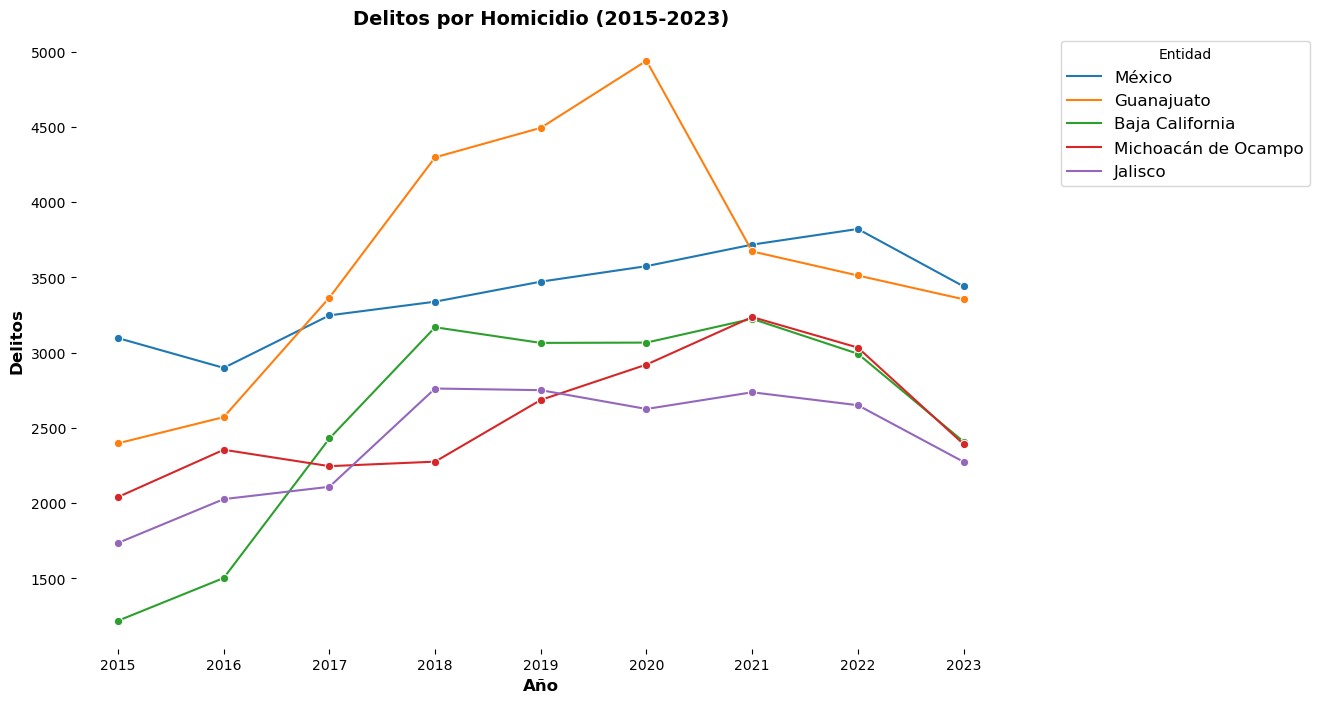

In [7]:
# Ordenar el DataFrame por el número de casos en orden descendente
df_sorted = df.loc[df['Tipo de delito']== 'Homicidio'].sort_values(by=['Año','Delitos'], ascending=[False,False])

# Tomar las primeras 5 entidades
top_5_entities = df_sorted['Entidad'].unique()[:5]

# Filtrar el DataFrame original solo para las primeras 5 entidades
df_top_5 = df_sorted[df_sorted['Entidad'].isin(top_5_entities)]

# Obtener el orden de las entidades según el DataFrame ordenado
order_of_entities = df_sorted['Entidad'].unique()[:5]

# Crear la gráfica de líneas con marcadores para las primeras 5 entidades
plt.figure(figsize=(12, 8))
plot = sns.lineplot(data=df_top_5, x='Año', y='Delitos', hue='Entidad', marker='o', hue_order=order_of_entities)

# Añadir título y etiquetas a los ejes
plt.title('Delitos por Homicidio (2015-2023)', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Delitos', fontsize=12, fontweight='bold', color='k')

# Ajustar leyenda
leyenda = plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)

# Exportar la gráfica a un archivo SVG
plt.savefig('grafica_homicidios_entidad_año.svg', format='svg', bbox_inches='tight')

# Mostrar la gráfica
plt.show()

In [8]:
poblacion_entidades['Poblacion mayor a 15 años'] = poblacion_entidades.iloc[:, 7:].sum(axis=1)

poblacion_entidades_mujeres = poblacion_entidades.loc[(poblacion_entidades['Sexo'] == 'Mujeres')]


In [9]:
poblacion_entidades = poblacion_entidades.loc[(poblacion_entidades['Sexo'] == 'Total')]

poblacion_entidades_mayor15 = poblacion_entidades[['Entidad federativa','Periodo','Total','Poblacion mayor a 15 años']]

poblacion_entidades_mayor15 = poblacion_entidades_mayor15.loc[(poblacion_entidades['Entidad federativa'] != 'Estados Unidos Mexicanos')]

df_homicidio = df.loc[(df['Tipo de delito'] == 'Homicidio')].reset_index()

df_homicidio = df_homicidio.drop(columns = 'index')



In [10]:

# Filtrar los datos para los intervalos especificados
df_intervalo_2015_2019 = df_homicidio[df_homicidio['Año'].between(2015, 2019)]
df_intervalo_2020_2023 = df_homicidio[df_homicidio['Año'].between(2020, 2023)]

# Fusionar ambos dataframes
merged_df = pd.merge(df_intervalo_2015_2019, poblacion_entidades_mayor15[poblacion_entidades_mayor15['Periodo'] == 2010], how='left', left_on='Entidad', right_on='Entidad federativa')
merged_df = pd.concat([merged_df, pd.merge(df_intervalo_2020_2023, poblacion_entidades_mayor15[poblacion_entidades_mayor15['Periodo'] == 2020], how='left', left_on='Entidad', right_on='Entidad federativa')])

# Ordenar por año
merged_df = merged_df.sort_values(by='Año')

# Calcular la tasa de homicidios
merged_df['Tasa de Homicidios'] = (merged_df['Delitos'] / merged_df['Poblacion mayor a 15 años']) * 100000


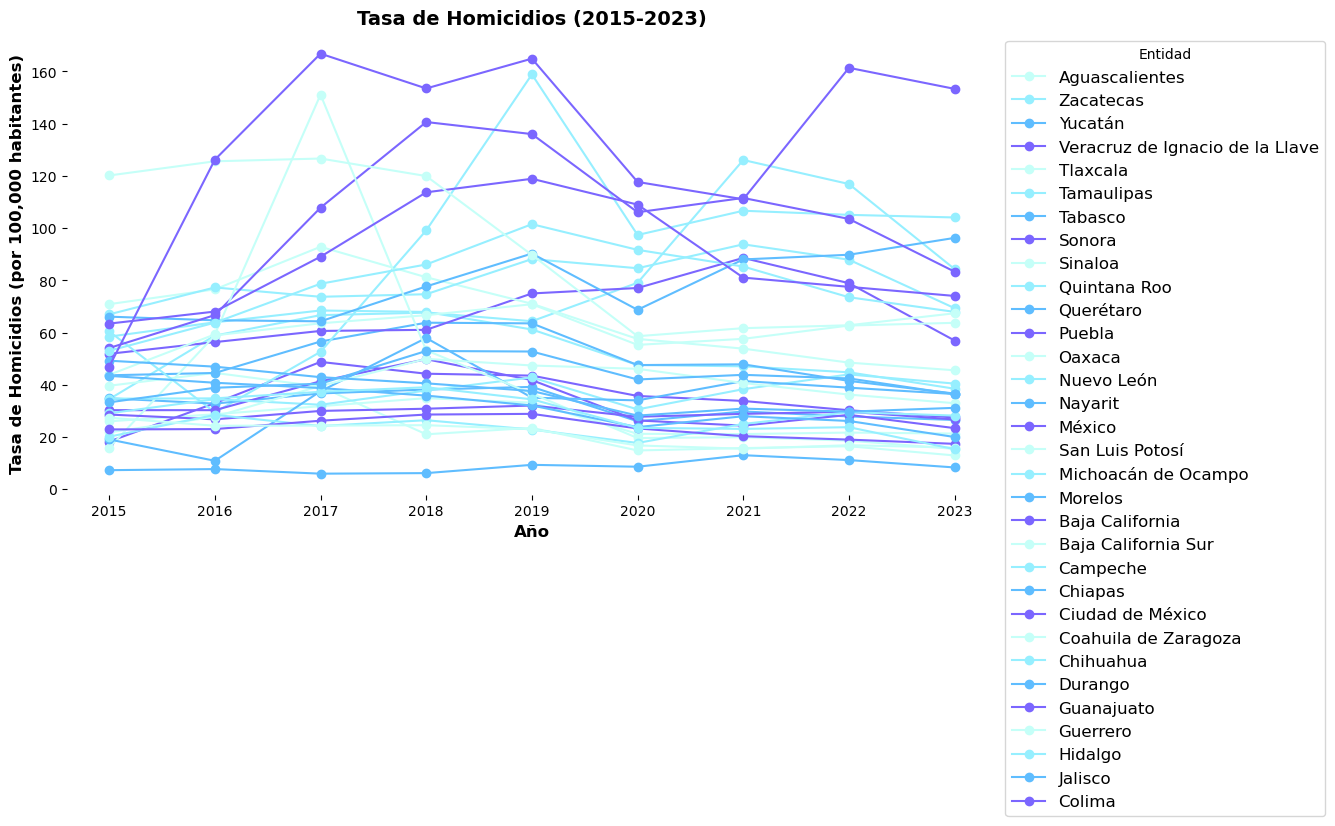

In [11]:
# Lista de colores
custom_colors = ['#C5FFF8', '#96EFFF', '#5FBDFF', '#7B66FF']

# Crear el gráfico de líneas con Matplotlib
plt.figure(figsize=(12, 6))

# Iterar sobre las entidades y graficar las líneas
for entidad in merged_df['Entidad'].unique():
    entidad_data = merged_df[merged_df['Entidad'] == entidad]
    plt.plot(entidad_data['Año'], entidad_data['Tasa de Homicidios'], marker='o', label=entidad, color=custom_colors[len(plt.gca().get_lines()) % len(custom_colors)])

# Configuraciones del gráfico
plt.title('Tasa de Homicidios (2015-2023)', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Tasa de Homicidios (por 100,000 habitantes)', fontsize=12, fontweight='bold', color='k')
# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)
# Muestra la leyenda fuera del gráfico
plt.legend(title='Entidad', bbox_to_anchor=(1, 1), loc='upper left', fontsize='large')
# Guardar la gráfica en un archivo SVG
plt.savefig('Tasa de Homicidios (2015-2023).svg', format='svg', bbox_inches='tight')


plt.show()


# Tasa de Homicidios

C:\Users\end_w\AppData\Local\Temp\ipykernel_14980\434429830.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tasa_mexico = merged_df.groupby('Año')['Delitos', 'Poblacion mayor a 15 años'].sum()


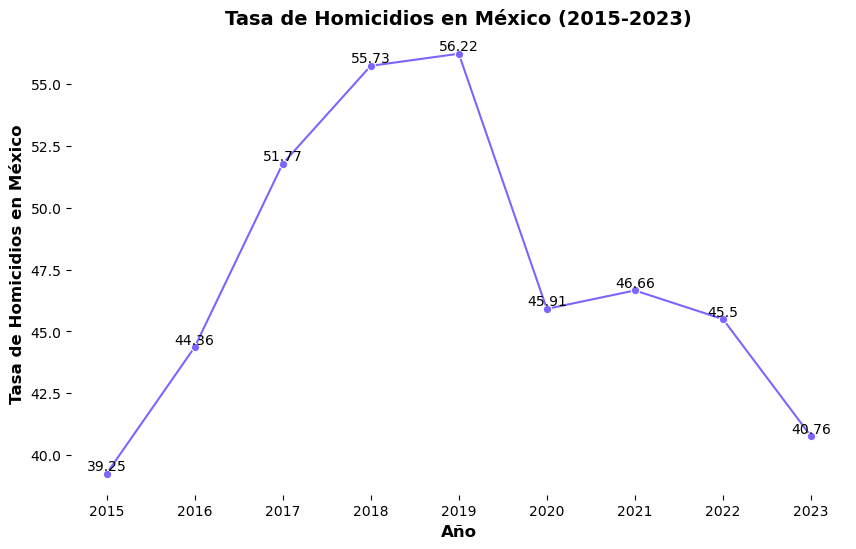

In [12]:
# Lista de colores
custom_colors = ['#C5FFF8', '#96EFFF', '#5FBDFF', '#7B66FF']

# Calcular la tasa de homicidios para México
tasa_mexico = merged_df.groupby('Año')['Delitos', 'Poblacion mayor a 15 años'].sum()
tasa_mexico['Tasa Homicidios'] = (tasa_mexico['Delitos'] / tasa_mexico['Poblacion mayor a 15 años']) * 100000
tasa_mexico = tasa_mexico.reset_index()

# Crear el gráfico de líneas con Seaborn y paleta de colores personalizada
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Tasa Homicidios', data=tasa_mexico, marker='o', color=custom_colors[3])

# Configuraciones del gráfico
plt.title('Tasa de Homicidios en México (2015-2023)', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Tasa de Homicidios en México', fontsize=12, fontweight='bold', color='k')

# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)
# Agregar los valores como texto en la gráfica
for index, row in tasa_mexico.iterrows():
    plt.text(row['Año'], row['Tasa Homicidios'], f"{round(row['Tasa Homicidios'],2)}", ha='center', va='bottom',fontsize=10)

# Guardar la gráfica en un archivo SVG
plt.savefig('Mayor tasa de homicidios en 2023.svg', format='svg', bbox_inches='tight')
# Mostrar la gráfica
plt.show()

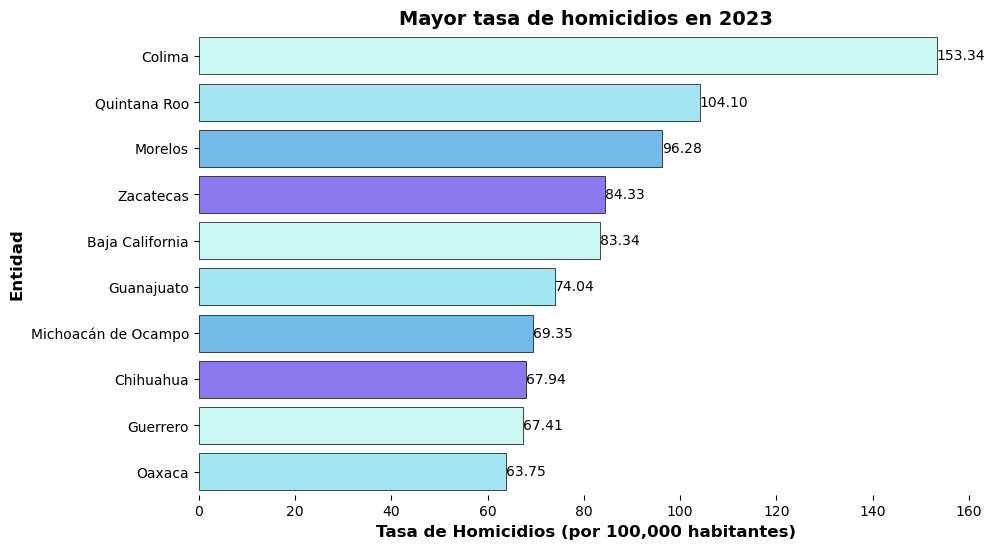

In [13]:
# Lista de colores
custom_colors = ['#C5FFF8', '#96EFFF', '#5FBDFF', '#7B66FF']

# tasa_homicidios_2023
tasa_homicidios_2023 = merged_df.loc[merged_df['Año'] == 2023].sort_values(by='Tasa de Homicidios', ascending=False).head(10)

# Crear el gráfico de barras horizontales con Seaborn y paleta de colores personalizada
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tasa de Homicidios', y='Entidad', data=tasa_homicidios_2023, palette=custom_colors, edgecolor='black', linewidth=0.5)

# Añadir título y etiquetas a los ejes
plt.title('Mayor tasa de homicidios en 2023', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Tasa de Homicidios (por 100,000 habitantes)', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Entidad', fontsize=12, fontweight='bold', color='k')

# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)

# Agregar el valor de 'Tasa de Homicidios' a cada barra
for bar, entidad, valor in zip(ax.patches, tasa_homicidios_2023['Entidad'], tasa_homicidios_2023['Tasa de Homicidios']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{valor:.2f}', ha='left', va='center', fontsize=10, color='k')


# Guardar la gráfica en un archivo SVG
plt.savefig('Barrra_Mayor tasa de homicidios en 2023.svg', format='svg', bbox_inches='tight')

# Mostrar la gráfica
plt.show()


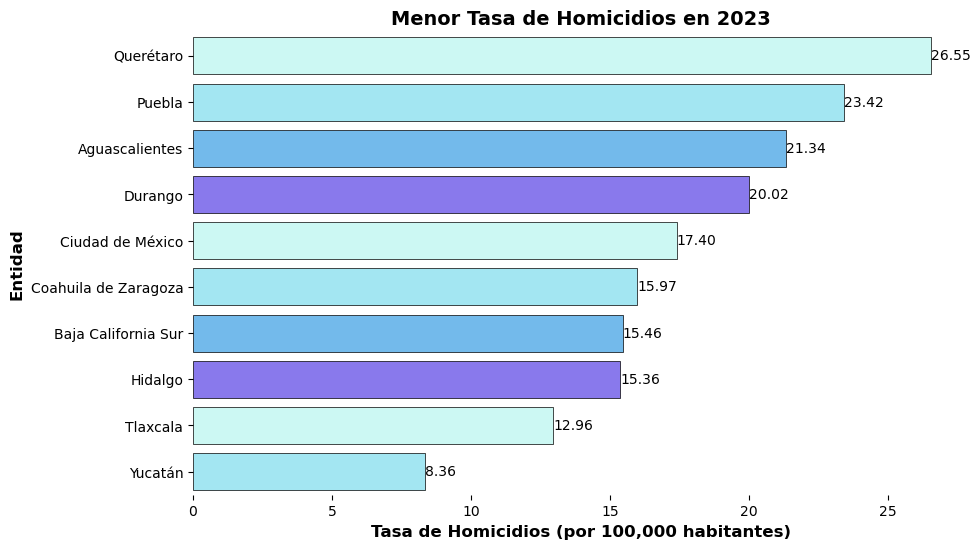

In [14]:
# Lista de colores
custom_colors = ['#C5FFF8', '#96EFFF', '#5FBDFF', '#7B66FF']

# Tasa de homicidios en 2023
tasa_homicidios_2023 = merged_df.loc[merged_df['Año'] == 2023].sort_values(by='Tasa de Homicidios', ascending=False).tail(10)

# Crear el gráfico de barras horizontales con Seaborn y paleta de colores personalizada
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tasa de Homicidios', y='Entidad', data=tasa_homicidios_2023, palette=custom_colors, edgecolor='black', linewidth=0.5)

# Añadir título y etiquetas a los ejes
plt.title('Menor Tasa de Homicidios en 2023', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Tasa de Homicidios (por 100,000 habitantes)', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Entidad', fontsize=12, fontweight='bold', color='k')

# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)

# Agregar el valor de 'Tasa de Homicidios' a cada barra
for bar, entidad, valor in zip(ax.patches, tasa_homicidios_2023['Entidad'], tasa_homicidios_2023['Tasa de Homicidios']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{valor:.2f}', ha='left', va='center', fontsize=10, color='k')


# Guardar la gráfica en un archivo SVG
plt.savefig('grafica_barra_tasa_homicidios_2023.svg', format='svg', bbox_inches='tight')

# Mostrar la gráfica
plt.show()




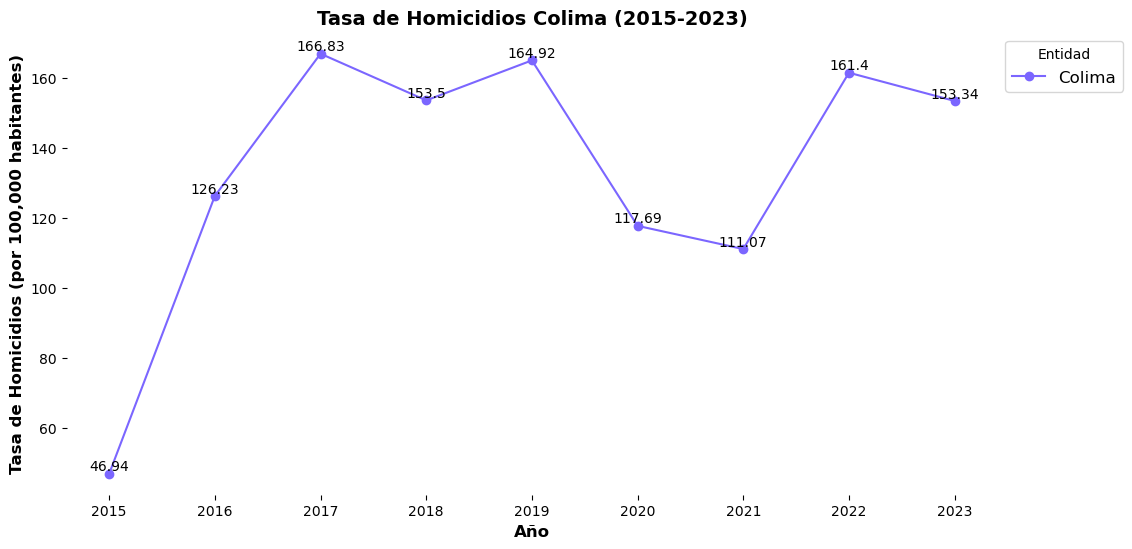

In [15]:
merged_df = merged_df.loc[merged_df['Entidad']=='Colima']

# Lista de colores
custom_colors = '#7B66FF'

# Crear el gráfico de líneas con Matplotlib
plt.figure(figsize=(12, 6))

# Iterar sobre las entidades y graficar las líneas
for entidad in merged_df['Entidad'].unique():
    entidad_data = merged_df[merged_df['Entidad'] == entidad]
    plt.plot(entidad_data['Año'], entidad_data['Tasa de Homicidios'], marker='o', label=entidad, color=custom_colors)

# Configuraciones del gráfico
plt.title('Tasa de Homicidios Colima (2015-2023)', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Tasa de Homicidios (por 100,000 habitantes)', fontsize=12, fontweight='bold', color='k')
# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)
# Muestra la leyenda fuera del gráfico
plt.legend(title='Entidad', bbox_to_anchor=(1, 1), loc='upper left', fontsize='large')


for index, row in merged_df.iterrows():
    plt.text(row['Año'], row['Tasa de Homicidios'], f"{round(row['Tasa de Homicidios'],2)}", ha='center', va='bottom',fontsize=10)

# Guardar la gráfica en un archivo SVG
plt.savefig('Tasa de Homicidios Colima (2015-2023).svg', format='svg', bbox_inches='tight')


plt.show()

# Tasa de Feminicidios

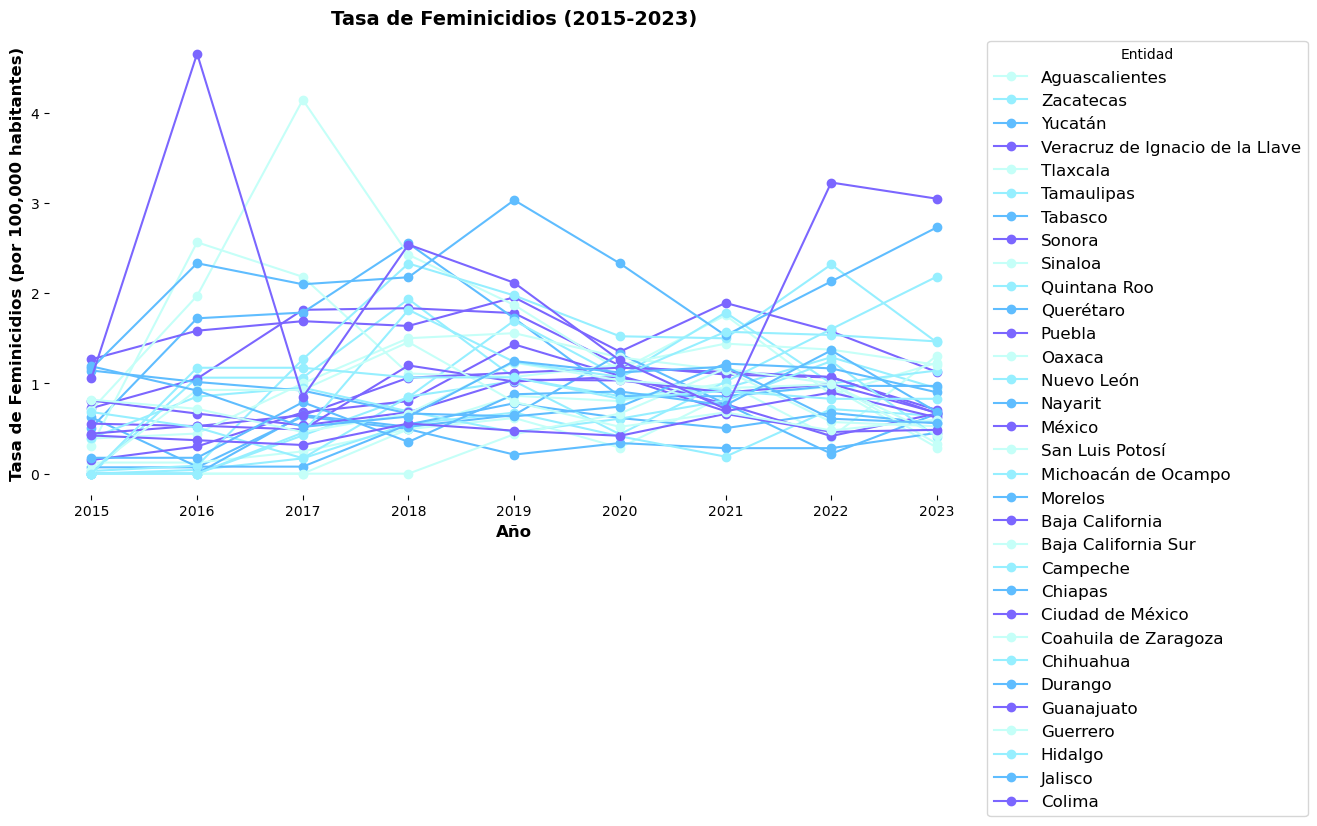

In [16]:
poblacion_entidades_mujeres_mayor15 = poblacion_entidades_mujeres[['Entidad federativa','Periodo','Total','Poblacion mayor a 15 años']]

poblacion_entidades_mujeres_mayor15 = poblacion_entidades_mayor15.loc[(poblacion_entidades['Entidad federativa'] != 'Estados Unidos Mexicanos')]

df_feminicidio = df.loc[(df['Tipo de delito'] == 'Feminicidio')].reset_index()

df_feminicidio = df_feminicidio.drop(columns = 'index')


# Filtrar los datos para los intervalos especificados
df_intervalo_2015_2019 = df_feminicidio[df_feminicidio['Año'].between(2015, 2019)]
df_intervalo_2020_2023 = df_feminicidio[df_feminicidio['Año'].between(2020, 2023)]

# Fusionar ambos dataframes
merged_df = pd.merge(df_intervalo_2015_2019, poblacion_entidades_mujeres_mayor15[poblacion_entidades_mujeres_mayor15['Periodo'] == 2010], how='left', left_on='Entidad', right_on='Entidad federativa')
merged_df = pd.concat([merged_df, pd.merge(df_intervalo_2020_2023, poblacion_entidades_mujeres_mayor15[poblacion_entidades_mujeres_mayor15['Periodo'] == 2020], how='left', left_on='Entidad', right_on='Entidad federativa')])

# Ordenar por año
merged_df = merged_df.sort_values(by='Año')

# Calcular la tasa de homicidios
merged_df['Tasa de Feminicidios'] = (merged_df['Delitos'] / merged_df['Poblacion mayor a 15 años']) * 100000

# Lista de colores
custom_colors = ['#C5FFF8', '#96EFFF', '#5FBDFF', '#7B66FF']

###

# Crear el gráfico de líneas con Matplotlib
plt.figure(figsize=(12, 6))

# Iterar sobre las entidades y graficar las líneas
for entidad in merged_df['Entidad'].unique():
    entidad_data = merged_df[merged_df['Entidad'] == entidad]
    plt.plot(entidad_data['Año'], entidad_data['Tasa de Feminicidios'], marker='o', label=entidad, color=custom_colors[len(plt.gca().get_lines()) % len(custom_colors)])

# Configuraciones del gráfico
plt.title('Tasa de Feminicidios (2015-2023)', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Tasa de Feminicidios (por 100,000 habitantes)', fontsize=12, fontweight='bold', color='k')
# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)
# Muestra la leyenda fuera del gráfico
plt.legend(title='Entidad', bbox_to_anchor=(1, 1), loc='upper left', fontsize='large')
# Guardar la gráfica en un archivo SVG
plt.savefig('Tasa de Feminicidios (2015-2023).svg', format='svg', bbox_inches='tight')


plt.show()


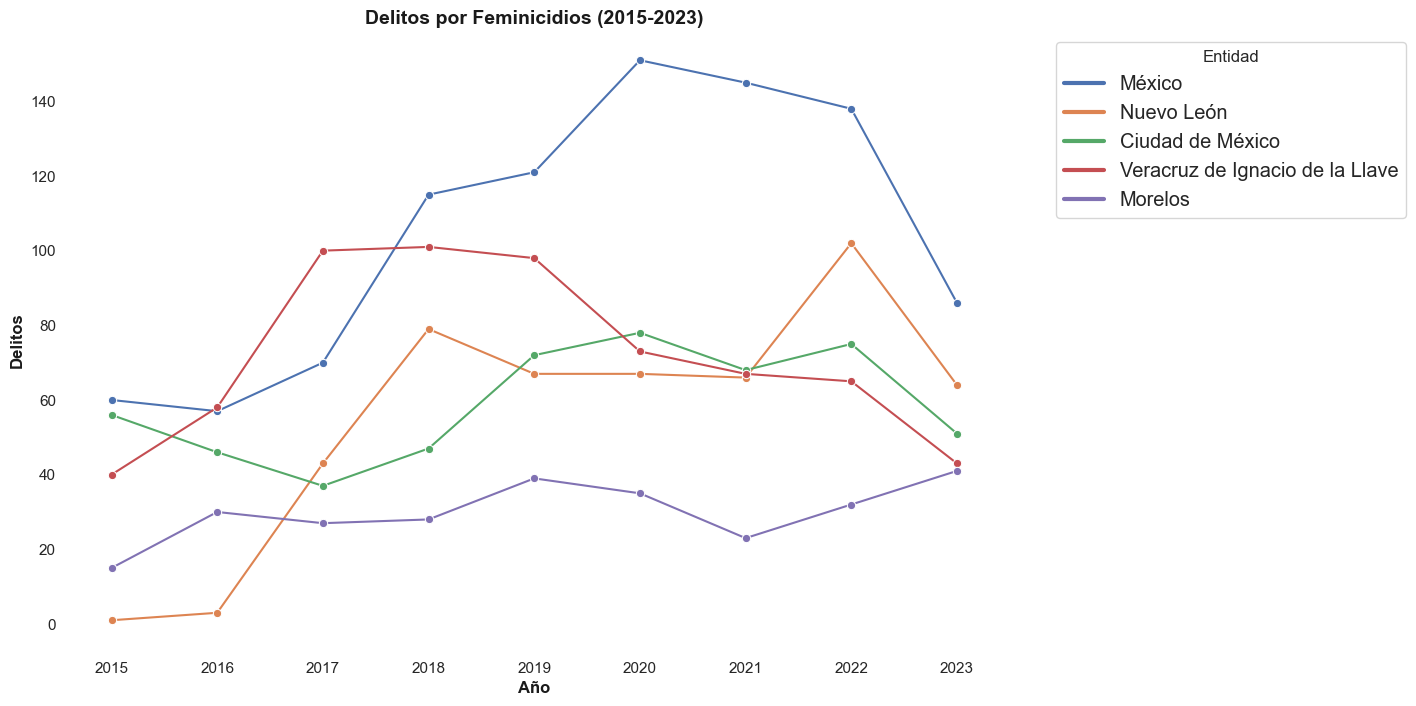

In [17]:

# Ordenar el DataFrame por el número de casos en orden descendente
df_sorted = merged_df.sort_values(by=['Año','Delitos'], ascending=[False,False])


# Tomar las primeras 5 entidades
top_5_entities = df_sorted['Entidad'].unique()[:5]

# Filtrar el DataFrame original solo para las primeras 5 entidades
df_top_5 = df_sorted[df_sorted['Entidad'].isin(top_5_entities)]

# Obtener el orden de las entidades según el DataFrame ordenado
order_of_entities = df_sorted['Entidad'].unique()[:5]


# Configuración del estilo de la gráfica
sns.set(style="whitegrid", rc={"grid.linestyle": ''})  # Eliminar la cuadrícula

# Crear la gráfica de líneas sin sombreado y con marcadores para las primeras 5 entidades
plt.figure(figsize=(12, 8))
plot = sns.lineplot(data=df_top_5, x='Año', y='Delitos', hue='Entidad', marker='o',hue_order=order_of_entities)

# Añadir título y etiquetas a los ejes
plt.title('Delitos por Feminicidios (2015-2023)', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Delitos', fontsize=12, fontweight='bold', color='k')
# Ajustar leyenda
leyenda = plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

# Engrosar las líneas de la leyenda
for line in leyenda.get_lines():
    line.set_linewidth(3)

# Configurar el fondo a blanco
plt.gca().set_facecolor('white')

# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)

# Exportar la gráfica a un archivo SVG
plt.savefig('grafica_feminicidios_entidad_año.svg', format='svg', bbox_inches='tight')

# Mostrar la gráfica
plt.show()

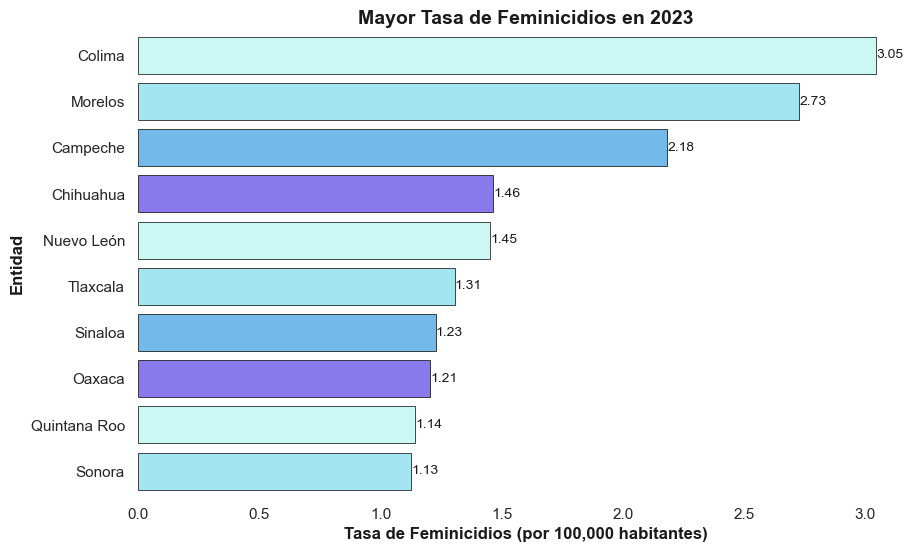

In [18]:
# Lista de colores
custom_colors = ['#C5FFF8', '#96EFFF', '#5FBDFF', '#7B66FF']

# Tasa de homicidios en 2023
tasa_feminicidios_2023 = merged_df.loc[merged_df['Año'] == 2023].sort_values(by='Tasa de Feminicidios', ascending=False).head(10)

# Crear el gráfico de barras horizontales con Seaborn y paleta de colores personalizada
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tasa de Feminicidios', y='Entidad', data=tasa_feminicidios_2023, palette=custom_colors, edgecolor='black', linewidth=0.5)

# Añadir título y etiquetas a los ejes
plt.title('Mayor Tasa de Feminicidios en 2023', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Tasa de Feminicidios (por 100,000 habitantes)', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Entidad', fontsize=12, fontweight='bold', color='k')

# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)
# Agregar el valor de 'Tasa de Homicidios' a cada barra
for bar, entidad, valor in zip(ax.patches, tasa_feminicidios_2023['Entidad'], tasa_feminicidios_2023['Tasa de Feminicidios']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{valor:.2f}', ha='left', va='center', fontsize=10, color='k')


# Guardar la gráfica en un archivo SVG
plt.savefig('grafica_barra_tasa_feminicidios_2023.svg', format='svg', bbox_inches='tight')

# Mostrar la gráfica
plt.show()

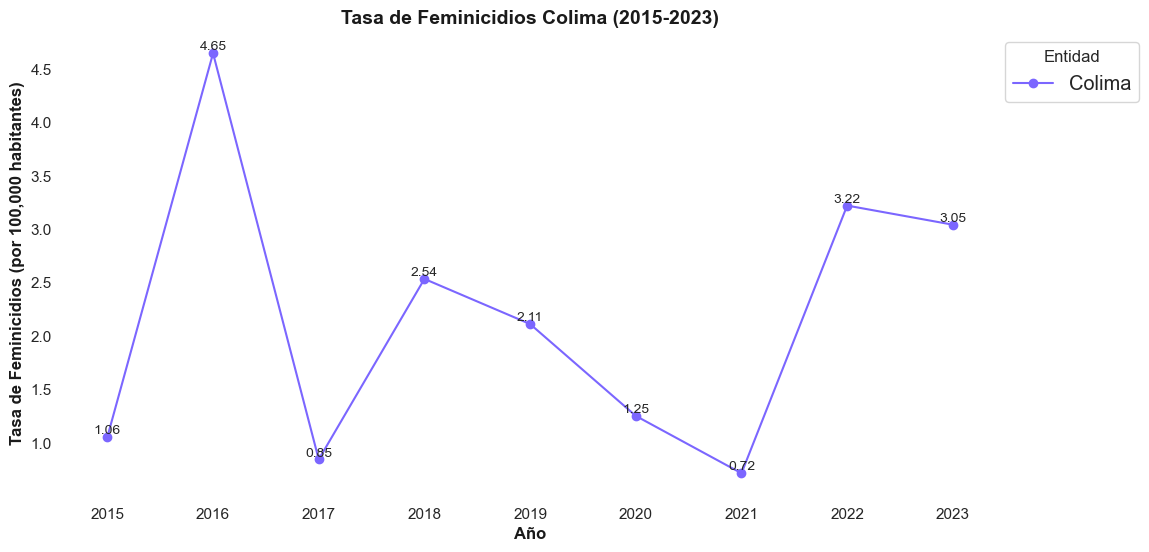

In [19]:
merged_df = merged_df.loc[merged_df['Entidad']=='Colima']

# Lista de colores
custom_colors = '#7B66FF'

# Crear el gráfico de líneas con Matplotlib
plt.figure(figsize=(12, 6))

# Iterar sobre las entidades y graficar las líneas
for entidad in merged_df['Entidad'].unique():
    entidad_data = merged_df[merged_df['Entidad'] == entidad]
    plt.plot(entidad_data['Año'], entidad_data['Tasa de Feminicidios'], marker='o', label=entidad, color=custom_colors)

# Configuraciones del gráfico
plt.title('Tasa de Feminicidios Colima (2015-2023)', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Tasa de Feminicidios (por 100,000 habitantes)', fontsize=12, fontweight='bold', color='k')
# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)
# Muestra la leyenda fuera del gráfico
plt.legend(title='Entidad', bbox_to_anchor=(1, 1), loc='upper left', fontsize='large')

for index, row in merged_df.iterrows():
    plt.text(row['Año'], row['Tasa de Feminicidios'], f"{round(row['Tasa de Feminicidios'],2)}", ha='center', va='bottom',fontsize=10)

# Guardar la gráfica en un archivo SVG
plt.savefig('Tasa de Feminicidios Colima (2015-2023).svg', format='svg', bbox_inches='tight')


plt.show()

In [20]:
dfhom = df.loc[df['Tipo de delito'] == 'Homicidio']


dfhom.groupby('Año')['Delitos'].sum().reset_index()




,Año,Delitos
0,2015,31331.0
1,2016,35410.0
2,2017,41326.0
3,2018,44485.0
4,2019,44876.0
5,2020,43276.0
6,2021,43978.0
7,2022,42884.0
8,2023,38422.0


In [21]:
df

,Año,Entidad,Tipo de delito,Delitos
0,2015,Aguascalientes,Aborto,5.0
1,2015,Aguascalientes,Abuso de confianza,419.0
2,2015,Aguascalientes,Abuso sexual,18.0
3,2015,Aguascalientes,Acoso sexual,0.0
4,2015,Aguascalientes,Allanamiento de morada,169.0
...,...,...,...,...
11515,2023,Zacatecas,Tráfico de menores,0.0
11516,2023,Zacatecas,Violación equiparada,124.0
11517,2023,Zacatecas,Violación simple,151.0
11518,2023,Zacatecas,Violencia de género en todas sus modalidades d...,0.0


# Porcentaje de homcidios por municipio en Colima (2015 - 2023)

In [22]:
df_colima = delitos_entidades.loc[(delitos_entidades['Entidad'] == 'Colima') & (delitos_entidades['Tipo de delito'] == 'Homicidio')]

df_colima = df_colima.groupby('Municipio')['Delitos'].sum().reset_index()


df_colima['Porcentaje de delitos'] = (df_colima['Delitos']/df_colima['Delitos'].sum())*100

df_colima = df_colima.sort_values(by = 'Porcentaje de delitos', ascending = False).reset_index()


df_colima = df_colima.drop(columns = 'index')

df_colima

,Municipio,Delitos,Porcentaje de delitos
0,Manzanillo,2040.0,33.181522
1,Colima,1332.0,21.665582
2,Tecomán,1174.0,19.095641
3,Villa de Álvarez,650.0,10.572544
4,Armería,390.0,6.343526
5,Coquimatlán,184.0,2.992843
6,Cuauhtémoc,182.0,2.960312
7,Comala,107.0,1.740403
8,Minatitlán,48.0,0.780742
9,Ixtlahuacán,41.0,0.666884


# Porcentaje de homicidios por municipio en Colima (2023)

In [23]:


df_colima_2023 = delitos_entidades.loc[(delitos_entidades['Entidad'] == 'Colima') & (delitos_entidades['Año'] == 2023) & (delitos_entidades['Tipo de delito'] == 'Homicidio')].reset_index()

df_colima_2023 = df_colima_2023.groupby('Municipio')['Delitos'].sum().reset_index()


df_colima_2023['Porcentaje de delitos'] = (df_colima_2023['Delitos']/df_colima_2023['Delitos'].sum())*100

df_colima_2023 = df_colima_2023.sort_values(by = 'Porcentaje de delitos', ascending = False).reset_index()


df_colima_2023 = df_colima_2023.drop(columns = 'index')

df_colima_2023

,Municipio,Delitos,Porcentaje de delitos
0,Colima,262.0,30.607477
1,Manzanillo,227.0,26.518692
2,Villa de Álvarez,146.0,17.056075
3,Tecomán,91.0,10.630841
4,Cuauhtémoc,40.0,4.672897
5,Coquimatlán,39.0,4.556075
6,Comala,26.0,3.037383
7,Armería,17.0,1.985981
8,Minatitlán,6.0,0.700935
9,Ixtlahuacán,2.0,0.233645


In [24]:
delitos_entidades

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Delitos
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,0,1,1,0,2,1,0,1,10.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,1,0,1,0,0,0,0,4.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,3,2,0,1,2,0,0,0,10.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,1,0,0,0,0,0,0,0,0,2.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,1,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075733,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,...,0,0,0,0,0,0,0,0,0,0.0
2075734,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0.0
2075735,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0,0,0,0,0,0,0,0.0
2075736,2023,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,0,0,0.0


In [43]:
delitos_entidades_2023 = delitos_entidades.loc[delitos_entidades['Año']==2023]

delitos_por_estado = delitos_entidades_2023.groupby(['Entidad','Tipo de delito'])['Delitos'].sum().reset_index().sort_values(by=['Entidad','Delitos'], ascending=[True,False])

# Encontrar el índice del máximo valor en 'Delitos' para cada grupo (Tipo de delito y Entidad)
idx_max_delitos = delitos_por_estado.groupby(['Entidad'])['Delitos'].idxmax()

# Seleccionar las filas correspondientes a los índices encontrados
delitos_mas_cometidos = delitos_por_estado.loc[idx_max_delitos, ['Entidad', 'Tipo de delito', 'Delitos']]

delitos_mas_cometidos['Tipo de delito'].value_counts()



Robo                             24
Violencia familiar                5
Amenazas                          2
Otros delitos del Fuero Común     1
Name: Tipo de delito, dtype: int64